In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/code/')
from time_series_plots import plot_time_series
sns.set_style("darkgrid")

In [32]:
df = pd.read_csv('../data/Master_data.csv', index_col='date', parse_dates=True)
df.drop(columns=['year', 'month'], inplace=True)
df


,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,imports_yoy,...,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions,credit_yoy
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,13.143736,2.760736,...,5.118800e+10,1.289199e+12,7.281720e+11,2.068559e+12,.,7.0325,NaN,NaN,NaN,12.391364
2001-02-01,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,8.400292,0.200602,...,5.152400e+10,1.303434e+12,7.330290e+11,2.087987e+12,15.63,7.0500,NaN,NaN,NaN,12.757135
2001-03-01,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,-6.099935,-1.601602,...,5.189600e+10,1.313079e+12,7.357760e+11,2.100751e+12,.,6.9520,NaN,NaN,NaN,12.611905
2001-04-01,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,3.851262,-0.710660,...,5.212400e+10,1.315105e+12,7.335270e+11,2.100756e+12,.,7.0775,NaN,NaN,NaN,12.895804
2001-05-01,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,15.420561,-0.809717,...,5.246000e+10,1.310869e+12,7.328300e+11,2.096159e+12,15.06,7.1450,NaN,NaN,NaN,12.498904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,335431000.0,3.8,4.531443,3.665112,7.248886,-3.616573,-0.963828,4.254121,-3.560107,-2.973721,...,1.311930e+11,2.759355e+12,1.814347e+12,4.704895e+12,21.19,7.0720,NaN,NaN,NaN,3.964872
2023-09-01,335612000.0,3.8,4.517517,3.699698,7.145857,-0.450322,-1.417903,3.692255,2.757021,-1.467505,...,1.314810e+11,2.770345e+12,1.820744e+12,4.722570e+12,.,7.2000,NaN,NaN,NaN,3.577056
2023-10-01,335773000.0,3.8,4.281346,3.241145,6.730727,-4.529580,-0.773349,3.300742,-5.826693,-1.751927,...,1.317850e+11,2.762721e+12,1.824036e+12,4.718542e+12,.,7.6200,NaN,NaN,NaN,2.967773


In [33]:
df_FRB = pd.read_csv('../data/frb_monthly_debt_bal_clean.csv', index_col='date', parse_dates=True)
df_FRB.head()

,percent_change_of_total_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),percent_change_of_total_revolving_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),percent_change_of_total_nonrevolving_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),total_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),revolving_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),nonrevolving_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000),total_securitized_consumer_credit_not_seasonally_adjusted_level_(currency_1000000),total_consumer_credit_owned_and_securitized_by_depository_institutions_not_seasonally_adjusted_level_(currency_1000000),total_consumer_credit_owned_by_depository_institutions_not_seasonally_adjusted_level_(currency_1000000),...,finance_rate_on_personal_loans_at_commercial_banks_24_month_loan;_not_seasonally_adjusted_(percent_1),commercial_bank_interest_rate_on_credit_card_plans_all_accounts;_not_seasonally_adjusted_(percent_1),commercial_bank_interest_rate_on_credit_card_plans_accounts_assessed_interest;_not_seasonally_adjusted_(percent_1),new_car_average_finance_rate_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(percent_1),weighted-average_maturity_of_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(months_1),loan-to-value_ratio_of_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(percent_1),average_amount_financed_for_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(currency_1),average_maturity_of_new_car_loans_at_finance_companies_amount_of_finance_weighted_not_seasonally_adjusted_(months_1),average_finance_rate_of_new_car_loans_at_finance_companies_amount_of_finance_weighted_not_seasonally_adjusted_(percent_1),average_amount_financed_for_new_car_loans_at_finance_companies_not_seasonally_adjusted_(currency_1)
date,,,,,,,,,,,,,,,,,,,,,
1943-01-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554.0,2554.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943-02-01,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444.0,2444.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943-03-01,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376.0,2376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943-04-01,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324.0,2324.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943-05-01,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278.0,2278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_cc90 = pd.read_csv('../data/90_day_cc_delinquency_by_state.csv')
df_cc90.head()

,state,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,...,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021,Q4_2022
0,AK,5.21,5.68,5.20,6.61,6.40,5.58,7.01,7.61,5.65,...,5.00,3.98,5.36,5.01,5.83,6.34,6.58,7.84,7.53,6.46
1,AL,11.92,11.09,10.70,11.88,11.07,10.13,11.61,11.94,10.23,...,9.05,7.69,7.45,7.16,7.68,7.73,8.37,9.14,8.53,8.17
2,AR,11.22,10.75,10.08,11.38,10.79,10.15,11.79,11.54,9.61,...,8.58,7.01,7.63,7.81,8.66,9.06,9.74,10.74,10.23,9.49
3,AZ,8.97,9.19,8.34,9.10,8.96,10.95,16.36,17.26,14.44,...,12.00,8.94,9.26,8.63,9.54,9.87,10.39,10.93,9.40,8.01
4,CA,8.84,8.55,7.65,8.98,9.32,11.57,17.19,17.71,14.87,...,11.14,8.06,8.48,8.15,8.37,8.23,8.70,10.41,9.07,7.90


In [35]:
df_auto90 = pd.read_csv('../data/90_day_autoloan_delinquency_by_state.csv')
df_auto90.head()

,state,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,...,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021,Q4_2022
0,AK,0.83,1.04,1.06,0.91,1.17,1.28,1.70,2.18,1.99,...,1.69,1.78,1.70,2.09,2.41,2.29,2.53,2.93,2.53,2.05
1,AL,2.63,2.80,2.41,2.88,3.43,4.48,5.69,6.33,5.76,...,4.82,4.97,4.87,5.32,5.75,6.15,6.59,6.22,5.79,5.58
2,AR,2.06,2.30,1.77,2.21,2.62,3.14,3.98,4.26,3.72,...,2.53,3.03,3.19,3.89,4.39,4.97,5.47,5.33,4.60,4.38
3,AZ,2.86,2.92,2.43,2.60,3.82,5.70,7.46,8.78,8.13,...,4.87,4.46,4.01,4.29,4.57,4.75,5.22,4.89,4.00,3.73
4,CA,1.89,2.10,1.90,2.62,3.60,4.98,6.18,6.48,5.50,...,3.07,2.85,2.55,2.92,3.63,4.15,4.89,4.80,3.83,3.35


In [36]:
# Focusing on imports, vehicles, disposable personal income, govt benefits (medicare/medicaid etc), taxes

In [37]:
df_subset = df[['cpi_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy', 'personal_saving_as_a_percentage_of_disposable_personal_income',
                'disp_inc_per_capita_current_dollars', 'tax_total_all_taxes', 'total_gov_social_benefits', 'social_security', 
                'medicare', 'medicaid', 'unemployment_insurance', "veterans'_benefits",
                 'cc_bals_90d_due_percentage', 'cc_bals_30d_due_percentage',
                 'disp_inc_per_capita_chained_2017', 'cc_balance_total_billions',
                 'total_disposable_personal_income']]
df_subset = df_subset.merge(df_FRB[['total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)']],
              left_index=True, right_index=True, how='left')
df_subset['total_consumer_credit'] = df_subset['total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)'] * 1000000
df_subset.drop(columns = 'total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)', inplace=True)
df_subset

,cpi_yoy,imports_yoy,new_&_used_vehicles_yoy,personal_saving_as_a_percentage_of_disposable_personal_income,disp_inc_per_capita_current_dollars,tax_total_all_taxes,total_gov_social_benefits,social_security,medicare,medicaid,unemployment_insurance,veterans'_benefits,cc_bals_90d_due_percentage,cc_bals_30d_due_percentage,disp_inc_per_capita_chained_2017,cc_balance_total_billions,total_disposable_personal_income,total_consumer_credit
date,,,,,,,,,,,,,,,,,,
2001-01-01,3.732227,2.760736,1.394422,4.5,26946.0,2.068559e+12,1.100584e+12,4.192080e+11,2.314920e+11,2.108160e+11,2.732400e+10,2.608800e+10,NaN,NaN,35962.0,NaN,7.651692e+12,1.744174e+12
2001-02-01,3.533569,0.200602,1.800000,4.6,27000.0,2.087987e+12,1.106776e+12,4.205400e+11,2.338800e+11,2.146440e+11,2.535600e+10,2.607600e+10,NaN,NaN,35977.0,NaN,7.672371e+12,1.746978e+12
2001-03-01,2.920561,-1.601602,1.397206,4.9,27064.0,2.100751e+12,1.115956e+12,4.226880e+11,2.361720e+11,2.195280e+11,2.367600e+10,2.598000e+10,NaN,NaN,36059.0,NaN,7.696337e+12,1.749724e+12
2001-04-01,3.269119,-0.710660,1.094527,4.8,27034.0,2.100756e+12,1.133332e+12,4.229760e+11,2.383440e+11,2.289960e+11,2.726400e+10,2.643600e+10,NaN,NaN,35956.0,NaN,7.693797e+12,1.765924e+12
2001-05-01,3.615160,-0.809717,0.495540,4.3,27034.0,2.096159e+12,1.140364e+12,4.228560e+11,2.403960e+11,2.315760e+11,2.910000e+10,2.636400e+10,NaN,NaN,35862.0,NaN,7.700196e+12,1.773883e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,3.665112,-2.973721,-0.803172,4.4,60556.0,4.704895e+12,3.991841e+12,1.362141e+12,9.463200e+11,8.795100e+11,2.106100e+10,1.728540e+11,NaN,NaN,50128.0,NaN,2.031233e+13,4.949642e+12
2023-09-01,3.699698,-1.467505,-1.915582,3.8,60719.0,4.722570e+12,3.977703e+12,1.363448e+12,9.479230e+11,8.687730e+11,2.076700e+10,1.730090e+11,NaN,NaN,50071.0,NaN,2.037816e+13,4.960666e+12
2023-10-01,3.241145,-1.751927,-1.819984,4.1,60895.0,4.718542e+12,3.979276e+12,1.379646e+12,9.495920e+11,8.652800e+11,2.211000e+10,1.732590e+11,NaN,NaN,50202.0,NaN,2.044674e+13,4.964114e+12


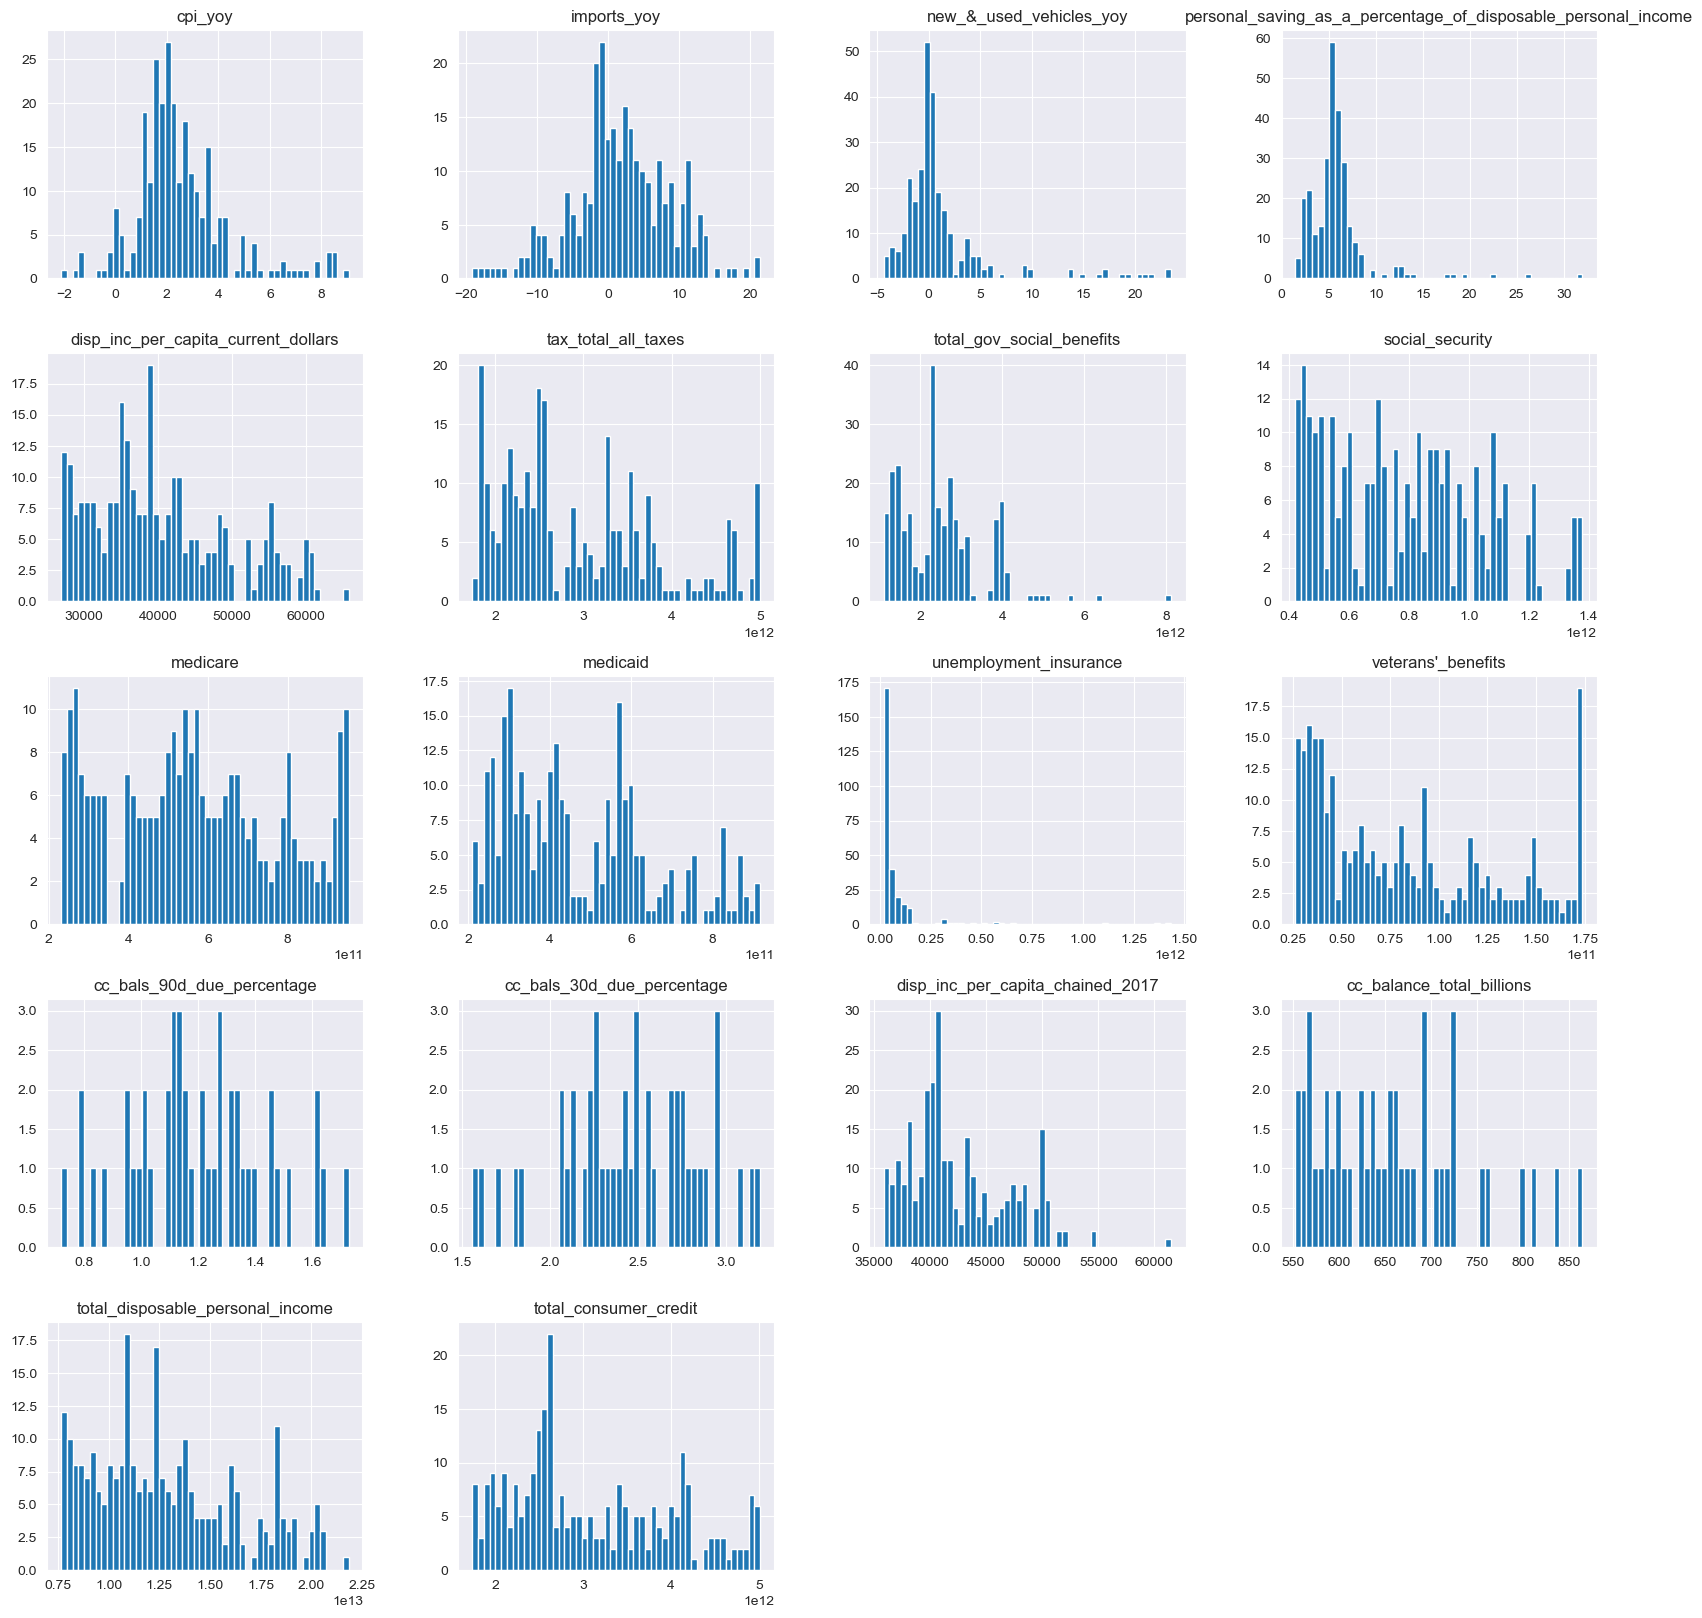

In [38]:
df_subset.hist(bins = 50, figsize = (20, 20));

### Inflation CPI compared to import and new/used 

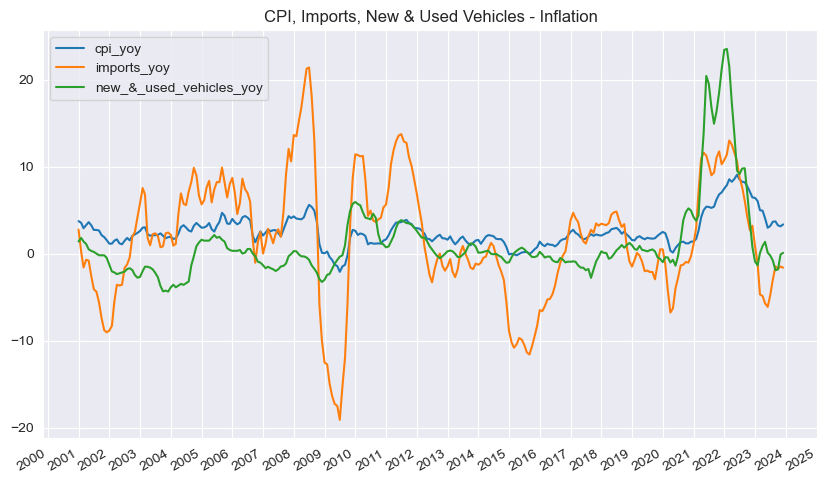

In [39]:
plot_time_series(df, columns = ['cpi_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy'], title = 'CPI, Imports, New & Used Vehicles - Inflation')

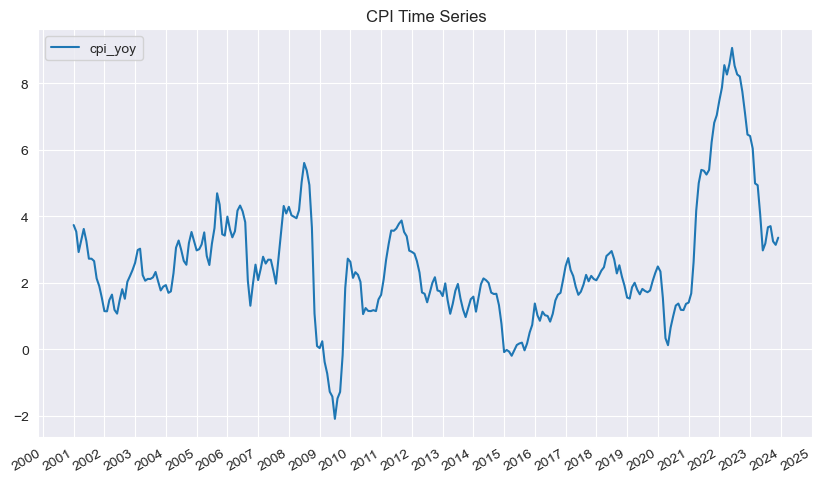

/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/code/time_series_plots.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


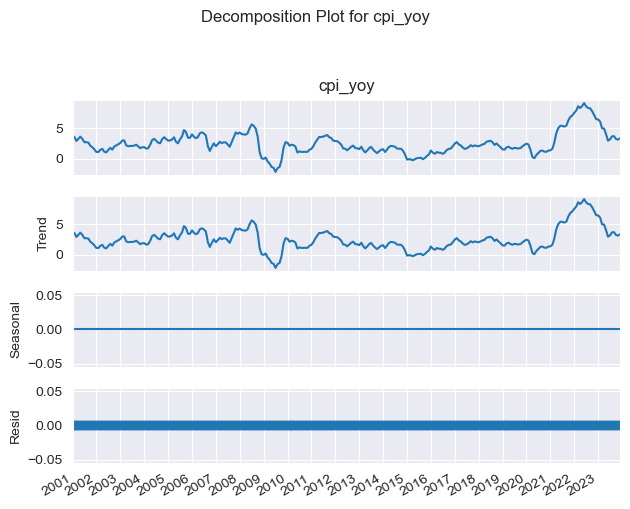

<Figure size 1000x600 with 0 Axes>

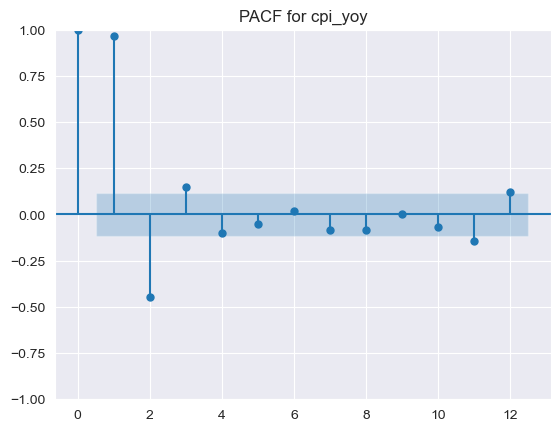

In [40]:
plot_time_series(df_subset, columns = ['cpi_yoy'], title = 'CPI Time Series', acc=True, pacf=True);

### Taxes and govt benefits plotted with Disposible Income, Savings and Credit

In [41]:
df_subset.corr(numeric_only=True)['total_disposable_personal_income'].sort_values(ascending=False)

total_disposable_personal_income                                 1.000000
disp_inc_per_capita_current_dollars                              0.999475
social_security                                                  0.989551
total_consumer_credit                                            0.987882
medicare                                                         0.987855
veterans'_benefits                                               0.987333
medicaid                                                         0.985716
disp_inc_per_capita_chained_2017                                 0.975810
tax_total_all_taxes                                              0.968755
total_gov_social_benefits                                        0.944089
cc_balance_total_billions                                        0.769403
new_&_used_vehicles_yoy                                          0.451405
personal_saving_as_a_percentage_of_disposable_personal_income    0.404414
cpi_yoy                               

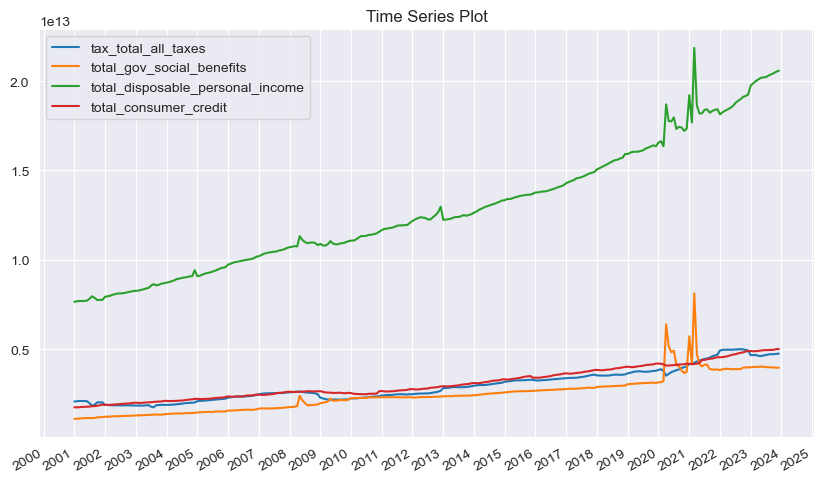

In [42]:
plot_time_series(df_subset, columns = ['tax_total_all_taxes', 
                                       'total_gov_social_benefits', 
                                       'total_disposable_personal_income',
                                       'total_consumer_credit'])

In [43]:
# analysis of gov benefits and types of benefit 

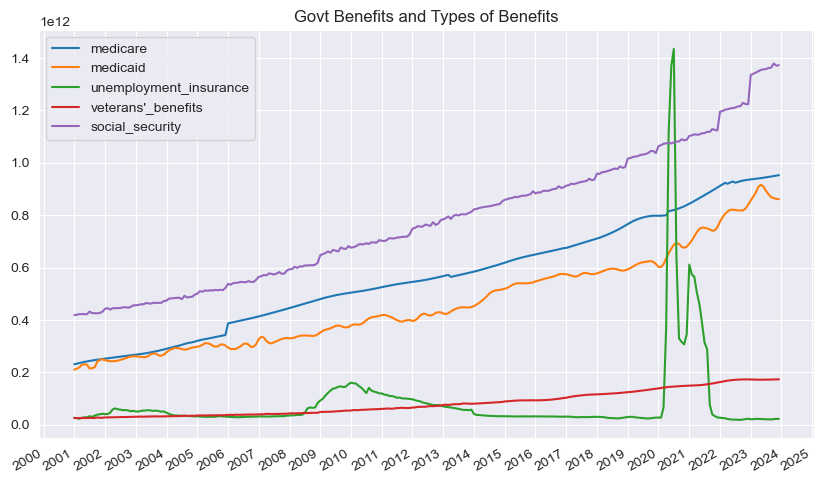

In [44]:
plot_time_series(df_subset, columns = ['medicare', 'medicaid', 
                                       'unemployment_insurance', 
                                       "veterans'_benefits", 
                                       'social_security'], title = 'Govt Benefits and Types of Benefits')

### Taxation 

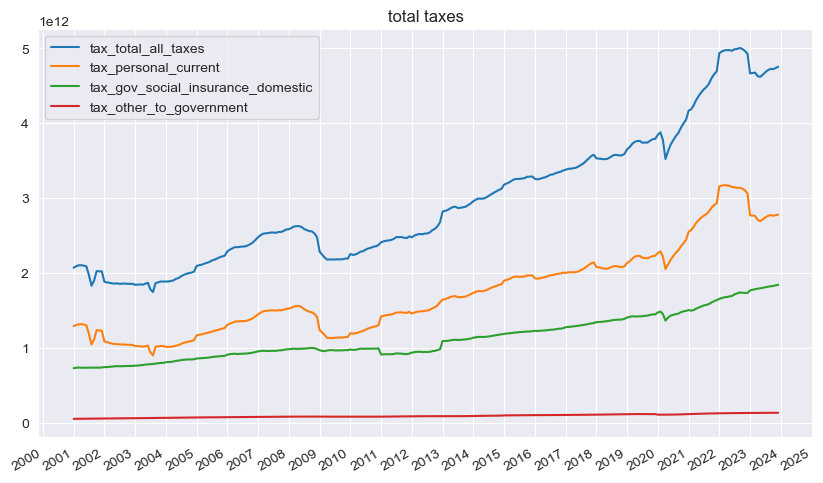

In [45]:
plot_time_series(df, columns = ['tax_total_all_taxes', 
                                       'tax_personal_current',
                                        'tax_gov_social_insurance_domestic',
                                        'tax_other_to_government'],title = 'total taxes')

In [46]:
df.corr(numeric_only=True)['tax_total_all_taxes'].sort_values(ascending=False)

tax_total_all_taxes                                                1.000000
tax_personal_current                                               0.995811
wages_salaries_private_employees                                   0.990048
wages_and_salaries_all                                             0.987927
total_employee_compensation                                        0.986343
tax_gov_social_insurance_domestic                                  0.986020
personal_dividend_income                                           0.985122
employer_contributions_for_government_social_insurance             0.982208
total_all_personal_outlays                                         0.979673
total_personal_income                                              0.978492
veterans'_benefits                                                 0.977859
medicaid                                                           0.975873
total_disposable_personal_income                                   0.968755
disp_inc_per

### Savings as % of disposible Income and CC Debt

In [47]:
df_subset.corr(numeric_only=True)['personal_saving_as_a_percentage_of_disposable_personal_income'].sort_values(ascending=False)

personal_saving_as_a_percentage_of_disposable_personal_income    1.000000
unemployment_insurance                                           0.721666
total_gov_social_benefits                                        0.627349
disp_inc_per_capita_chained_2017                                 0.545301
disp_inc_per_capita_current_dollars                              0.405410
total_disposable_personal_income                                 0.404414
veterans'_benefits                                               0.371647
medicare                                                         0.356862
social_security                                                  0.340768
total_consumer_credit                                            0.311036
medicaid                                                         0.310881
tax_total_all_taxes                                              0.248316
new_&_used_vehicles_yoy                                          0.083315
cc_bals_90d_due_percentage            

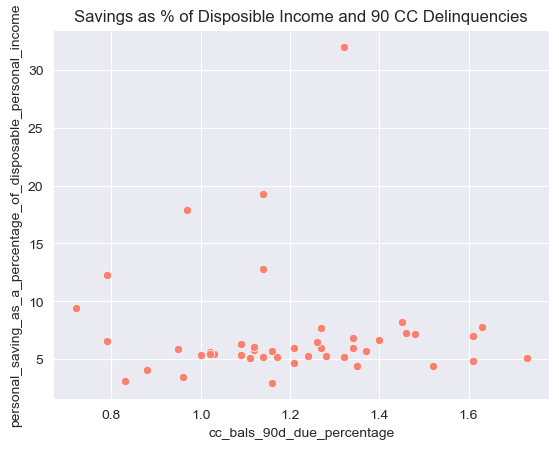

In [48]:
sns.scatterplot(df_subset, x = 'cc_bals_90d_due_percentage', y ='personal_saving_as_a_percentage_of_disposable_personal_income'
                , color = 'salmon')
plt.title('Savings as % of Disposible Income and 90 CC Delinquencies');

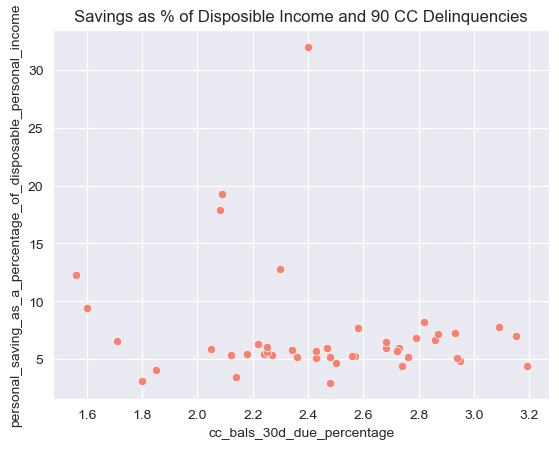

In [49]:
sns.scatterplot(df_subset, x = 'cc_bals_30d_due_percentage', y ='personal_saving_as_a_percentage_of_disposable_personal_income'
                , color = 'salmon')
plt.title('Savings as % of Disposible Income and 90 CC Delinquencies');

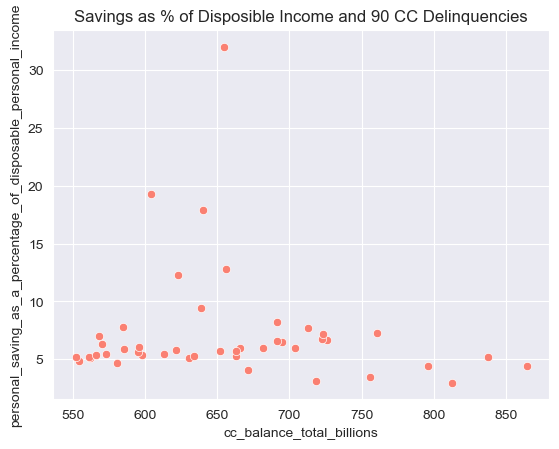

In [50]:
sns.scatterplot(df, x = 'cc_balance_total_billions', y ='personal_saving_as_a_percentage_of_disposable_personal_income'
                , color = 'salmon')
plt.title('Savings as % of Disposible Income and 90 CC Delinquencies');

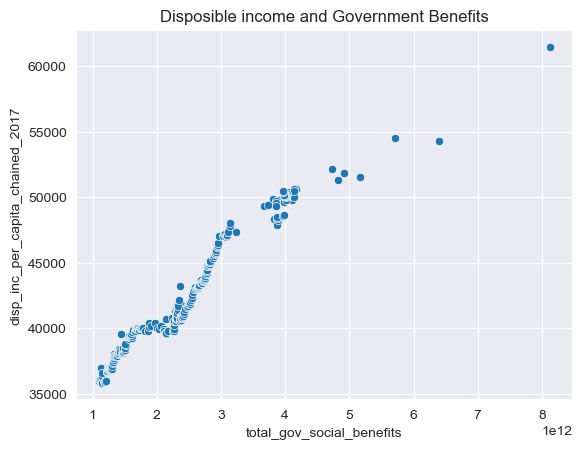

In [51]:
sns.scatterplot(df_subset, x = 'total_gov_social_benefits', y ='disp_inc_per_capita_chained_2017', legend = None)
plt.title('Disposible income and Government Benefits');

## Credit Growth 

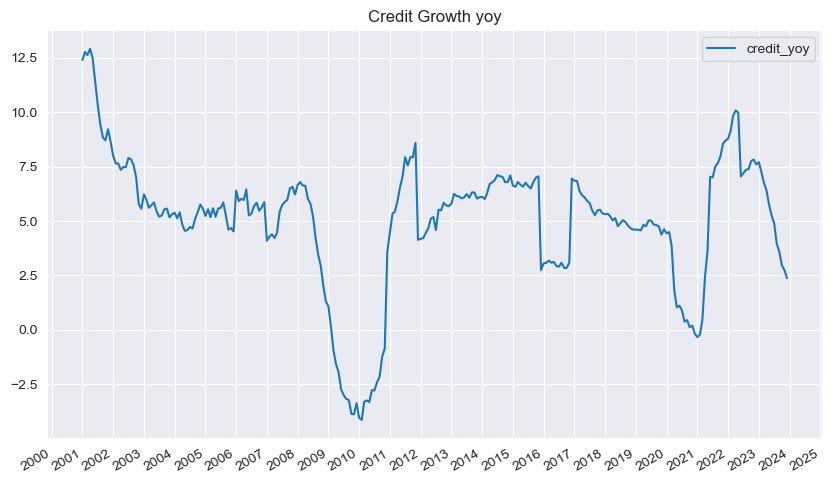

/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/code/time_series_plots.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


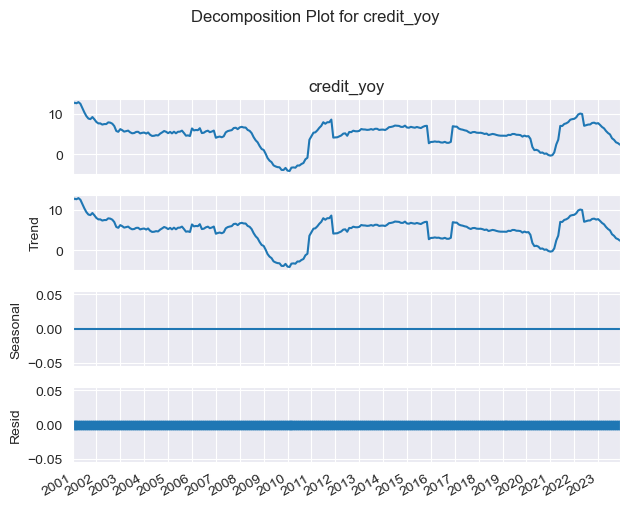

<Figure size 1000x600 with 0 Axes>

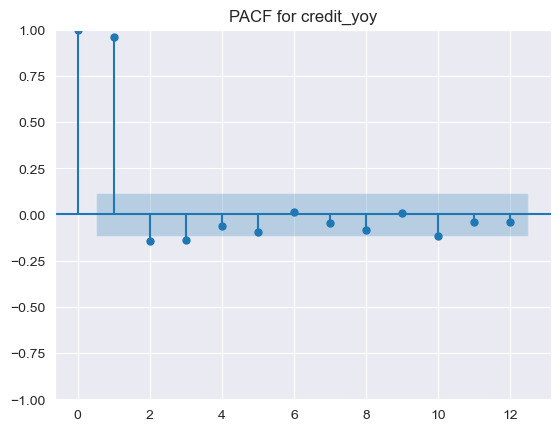

In [52]:
plot_time_series(df, columns = ['credit_yoy'],title = 'Credit Growth yoy', acc=True, pacf=True);

In [53]:
df.corr(numeric_only=True)['credit_yoy'].sort_values(ascending=False)

credit_yoy                                                         1.000000
shelter_yoy                                                        0.520146
cpi_yoy                                                            0.448303
food_yoy                                                           0.320199
energy_yoy                                                         0.299519
mortgage_rate_30_yr                                                0.248460
gasoline_yoy                                                       0.202741
all_less_food_&_shelter_yoy                                        0.184390
imports_yoy                                                        0.164761
tax_personal_current                                               0.136099
cc_balance_total_billions                                          0.111787
hourly_earnings_yoy                                                0.108193
medical_care_yoy                                                   0.103553
new_&_used_v

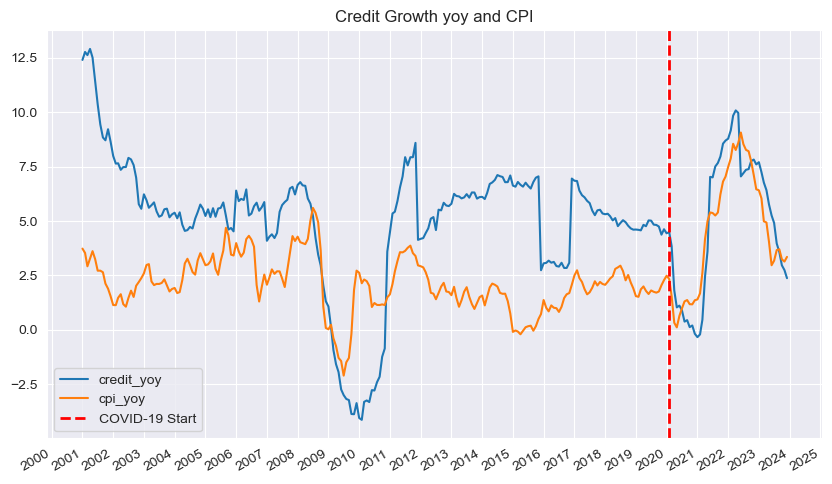

In [54]:
plot_time_series(df, columns = ['credit_yoy', 'cpi_yoy'], title = 'Credit Growth yoy and CPI', covid_start=True)

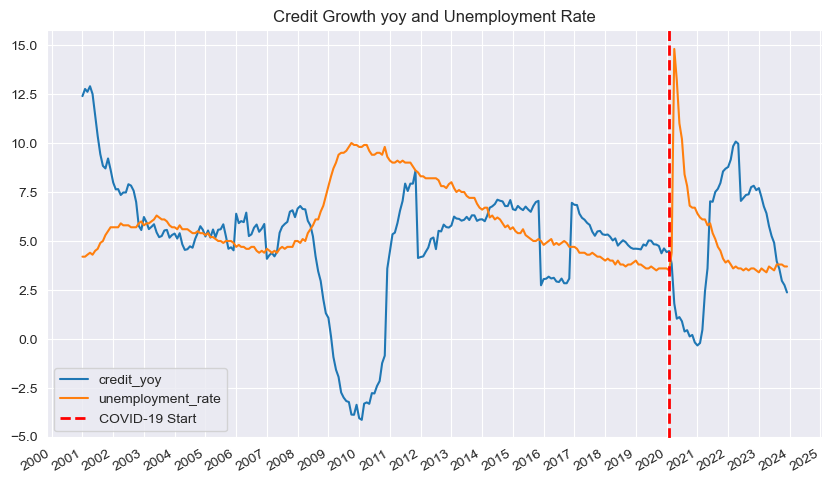

In [55]:
plot_time_series(df, columns = ['credit_yoy', 'unemployment_rate',
                                ], title = 'Credit Growth yoy and Unemployment Rate', covid_start=True);

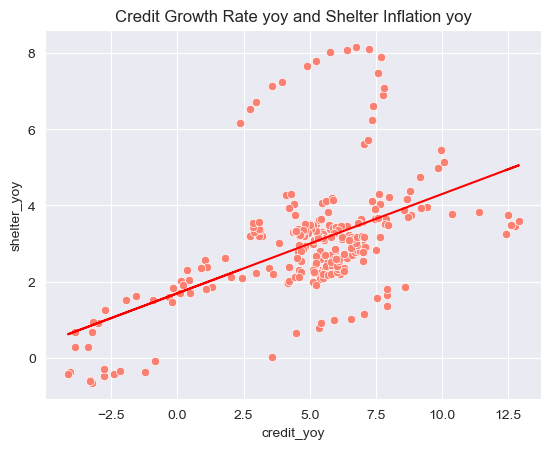

In [56]:
sns.scatterplot(df, x = 'credit_yoy', y ='shelter_yoy'
                , color = 'salmon')
plt.title('Credit Growth Rate yoy and Shelter Inflation yoy');
plt.plot(df['credit_yoy'], np.poly1d(np.polyfit(df['credit_yoy'], df['shelter_yoy'], 1))(df['credit_yoy']), color='red');